In [11]:
# imports
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')


## np.exp() function

In [5]:
## test the numpy exp function (it can take a scalar or a vector as an input)

inp = np.array([1, 2, 3])
print(np.exp(inp))

[ 2.71828183  7.3890561  20.08553692]


## sigmoid function

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


Text(0.5, 0, 'z')

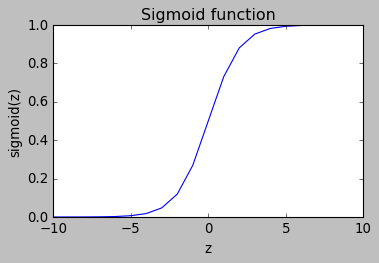

In [12]:
## implement sigmoid function 
##  g(z) = 1/(1 + e**-z)
## where z can be a scalar (single example) or a vector of m values (one for each example)

def sigmoid(z):
    return (1 / (1 + np.exp(-z)) )

## now test it out, the input z values are between -10 and 10 but the outputs
## are between 0 and 1

zvals = np.arange(-10,11)  # start (inclusive), stop (exclusive), default step is 1

print(zvals)

yvals = sigmoid(zvals)

print(yvals)

## now plot z versus g(z)
## the first two optional arguments define rows and columns of the subplot grid

fig,ax = plt.subplots(1,1,figsize=(5,3))  
ax.plot(zvals, yvals, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')




## Plot examples with two features



[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
there are 6 training examples each with 2 features


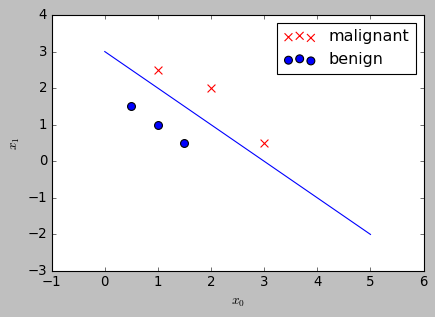

In [41]:
## we have m=6 training examples, each with n=2 features

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

print(X)

m,n = X.shape
print(f"there are {m} training examples each with {n} features")

#2d matrix containing only the pairs for which y=1
# and same thing for y=0 examples
Xpos = np.array([X[i] for i in range(m) if y[i]==1])
Xneg = np.array([X[i] for i in range(m) if y[i]==0])

## nb  X[:,0] for 0th column of 2d array
## and X[:,1] for 1st column of 2d array

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Xpos[:,0], Xpos[:,1], marker='x', s=50, c='r', label='malignant')   # plot x0 (column 0) versus x1 (column 1)
ax.scatter(Xneg[:,0], Xneg[:,1], marker='o', s=50,  c='b', label='benign')
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.legend()

## now let's add a decision boundary: pretend that we've already 
## trained the model and obtained some parameters b, w0 and w1 such that 
## z = −3+𝑥0+𝑥1 
## the model predicts y=1 for sigmoid(z)>=0.5 and so for z>=0
##                    y=0 for sigmoid(z)<0.5  and so for z<0
##
##  this means the decision boundary is at z = 0, 
##        ie the line −3+𝑥0+𝑥1=0
##           or, equivalently, x1 = 3-x0                         

x0vals = np.arange(0,6) 
yvals = 3 - x0vals

ax.plot(x0vals, yvals)



## Compute loss

In [ ]:
## Loss is the cost for a single example
## whereas cost is the loss for all the examples

def compute_loss():